## Learning Goals 
* My goals for this project were to solidify my knowledge of basic data cleaning, and to practice visualizations for data subsets with multiple categories.

## Background
* This is synthetic data for a made up cafe, created by kaggle user ahmedmohamed2003. It's shape is (10000, 7), containing three categorical columns, 3 numerical, and one datetime.

## Reflections
* Overall, I am pleased with the results of this project. I learned a lot about subsetting data, and visualizations. In the future, I would like to learn how I can properly simplify a time series graph. My graphs were much less legible than I would have liked. I did experiment with visualizing random samples of the data, and sorting the values by date, then taking every 10th row. These methods appeared to work with quantity by location, however when I tried it on a more complicated problem: quantity by item by location, it drastically changed the data. I see my next project being a more in-depth EDA project.

# Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = './dirty_cafe_sales.csv'
df = pd.read_csv(dataset, index_col = 0)

In [3]:
df.head()

,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
Transaction ID,,,,,,,
TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [4]:
df.shape

(10000, 7)

In [5]:
df.columns = df.columns.str.replace(' ','_').str.lower()

In [6]:
df.columns

Index(['item', 'quantity', 'price_per_unit', 'total_spent', 'payment_method',
       'location', 'transaction_date'],
      dtype='object')

In [7]:
df.rename_axis('transaction_id')

,item,quantity,price_per_unit,total_spent,payment_method,location,transaction_date
transaction_id,,,,,,,
TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...
TXN_7672686,Coffee,2,2.0,4.0,NaN,UNKNOWN,2023-08-30
TXN_9659401,NaN,3,NaN,3.0,Digital Wallet,NaN,2023-06-02
TXN_5255387,Coffee,4,2.0,8.0,Digital Wallet,NaN,2023-03-02


In [8]:
df.dtypes

item                object
quantity            object
price_per_unit      object
total_spent         object
payment_method      object
location            object
transaction_date    object
dtype: object

In [9]:
# drop irrelavent columns: payment method, price per unit
df.drop('payment_method',axis=1, inplace=True)
df.drop('price_per_unit',axis=1, inplace = True)

In [10]:
# change error and unknonw to nan
df.replace(['ERROR','UNKNOWN'],np.nan, inplace=True)

In [11]:
# convert categorical columns to type category, change to lowercase
categorical_cols = df[['item','location']]

for col in categorical_cols:
    df[col]=df[col].str.lower()

df['location']=df['location'].str.replace('-','')
df[['item','location']]=df[['item','location']].astype('category')

In [12]:
# change transaction_date column to datetime
df['transaction_date']=df['transaction_date'].astype(str)
df['transaction_date']=pd.to_datetime(df['transaction_date'],format='%Y-%m-%d',errors='coerce')

In [13]:
# chnage numeric columns to numeric type
numeric_columns = ['quantity','total_spent']
for col in numeric_columns:
    df[col]=pd.to_numeric(df[col],errors='coerce')

In [14]:
# verify changes 
df.dtypes

item                      category
quantity                   float64
total_spent                float64
location                  category
transaction_date    datetime64[ns]
dtype: object

In [15]:
df[df.duplicated()]

,item,quantity,total_spent,location,transaction_date
Transaction ID,,,,,
TXN_7028009,cake,4.0,12.0,takeaway,NaT
TXN_7549542,cookie,5.0,5.0,takeaway,NaT
TXN_8518516,sandwich,4.0,16.0,NaN,2023-08-16
TXN_1109715,cake,1.0,3.0,instore,2023-07-15
TXN_2601689,salad,4.0,20.0,takeaway,2023-01-14
...,...,...,...,...,...
TXN_8563793,juice,4.0,12.0,instore,2023-03-26
TXN_6796890,tea,4.0,6.0,NaN,2023-08-24
TXN_9226047,smoothie,3.0,12.0,NaN,NaT


# Missing Values 
Analysis of the missing values using Missingno supports the colclusion that the missing data in this dataset is MCAR because the matrix, heatmap and dendrogram all support the evidence that there is low correlation between missing points in any of the features. 
## Handling Missing Values
* transaction_date - drop missing values
* location - drop missing values
* item - drop missing values
* quantity - fill with mean
* total_spent - fill with mean

In [16]:
df.isnull().sum()/len(df)

item                0.0969
quantity            0.0479
total_spent         0.0502
location            0.3961
transaction_date    0.0460
dtype: float64

<Axes: >

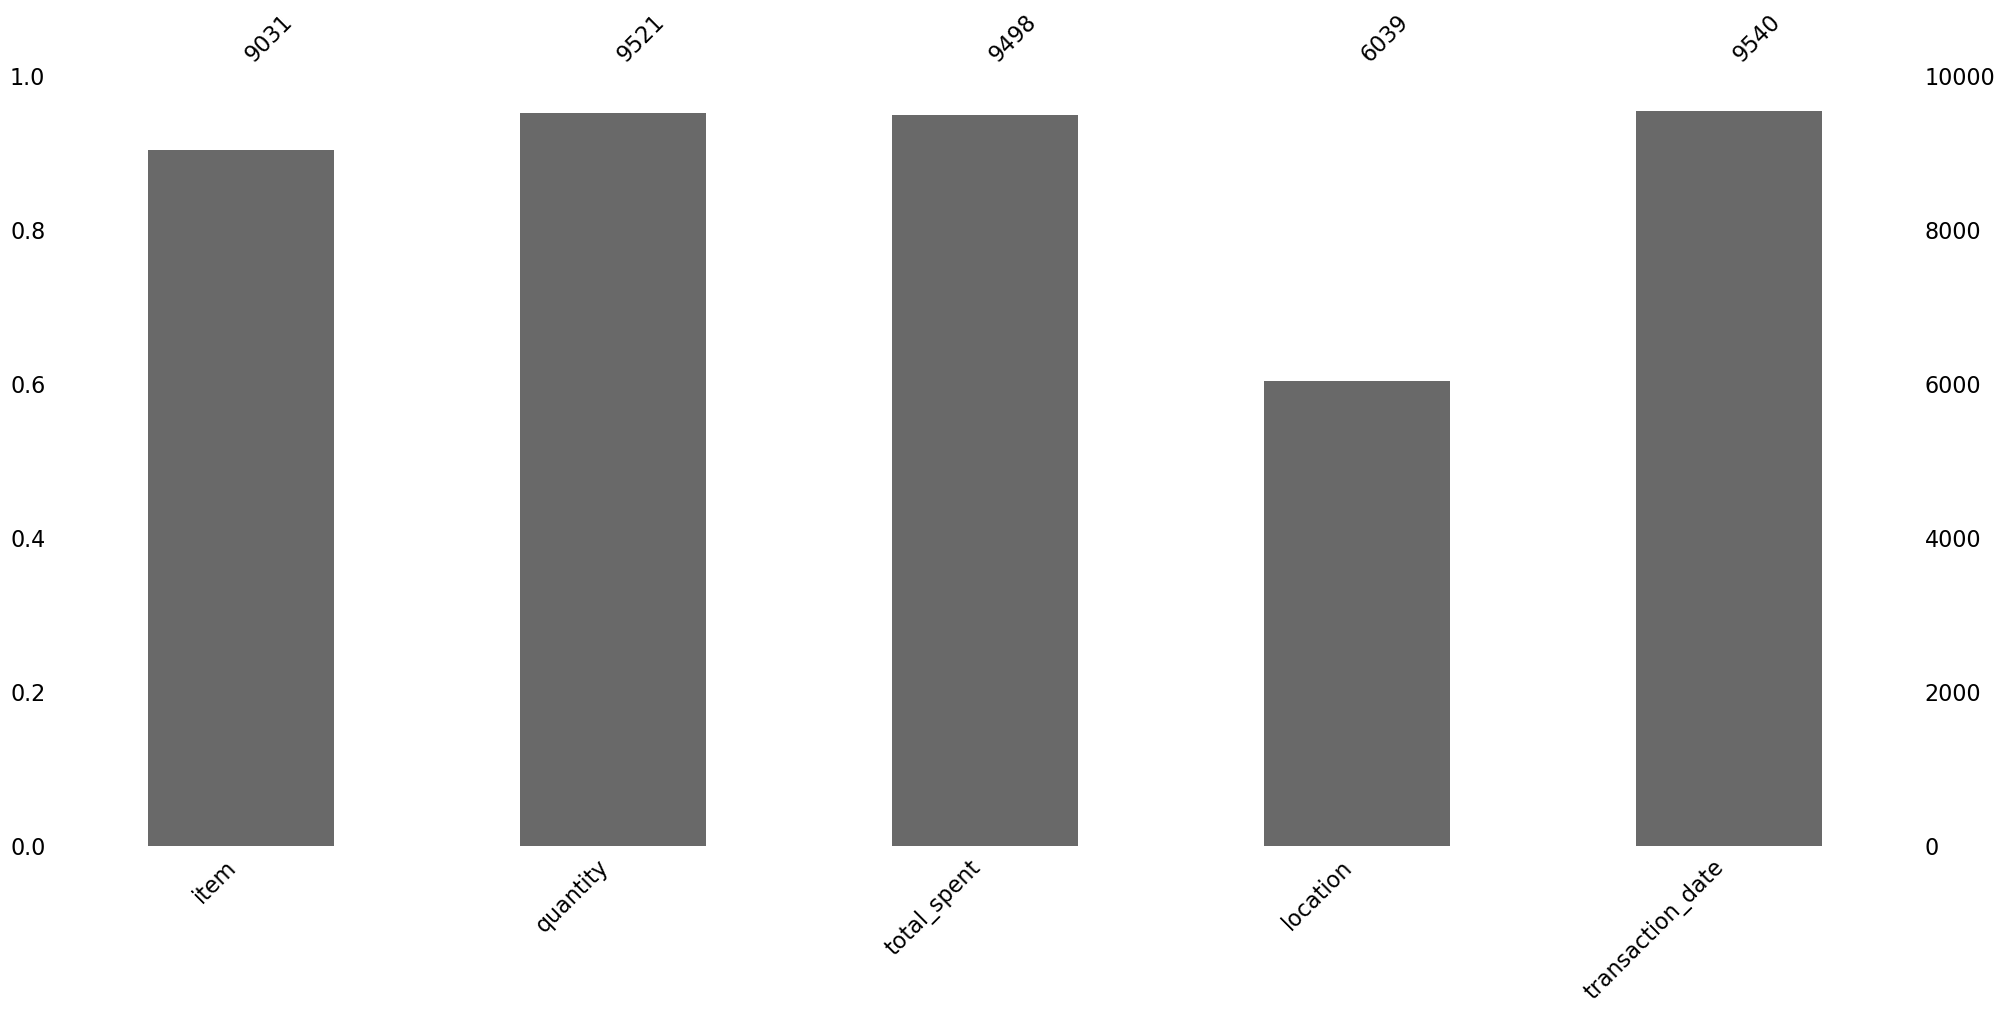

In [17]:
msno.bar(df)

<Axes: >

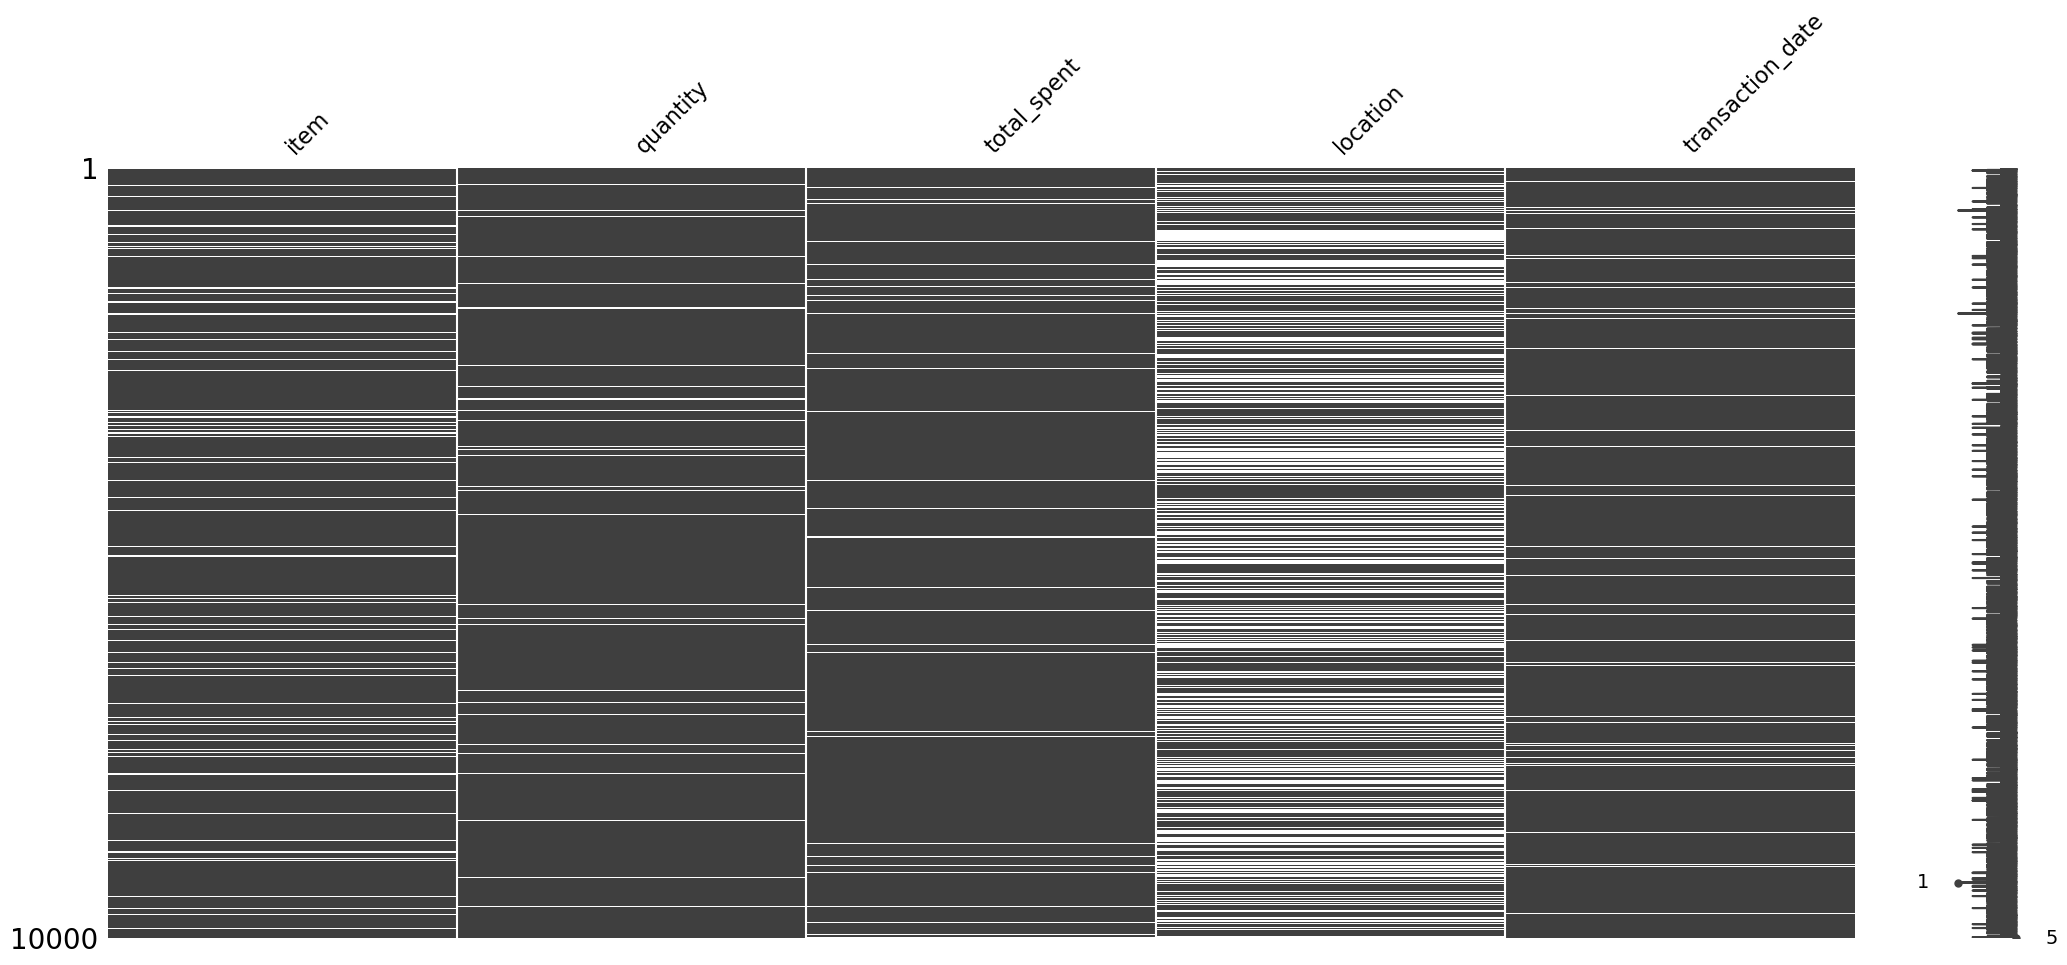

In [18]:
msno.matrix(df)

<Axes: >

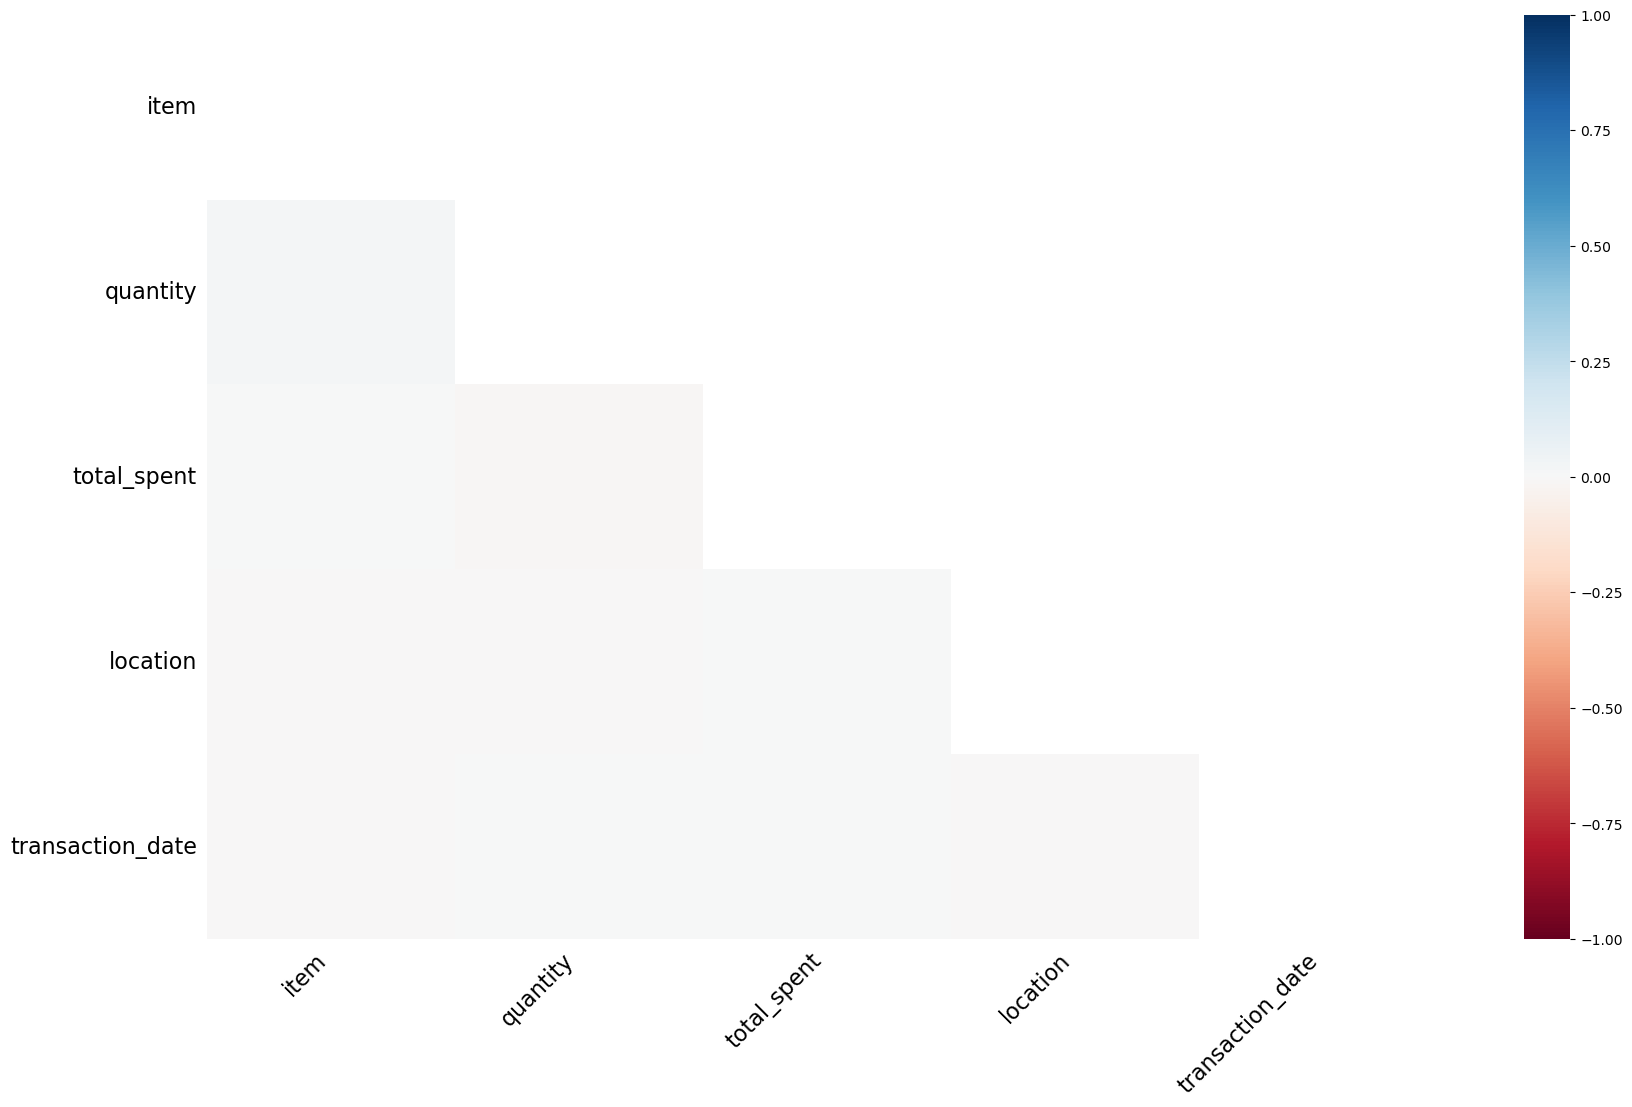

In [19]:
msno.heatmap(df)

<Axes: >

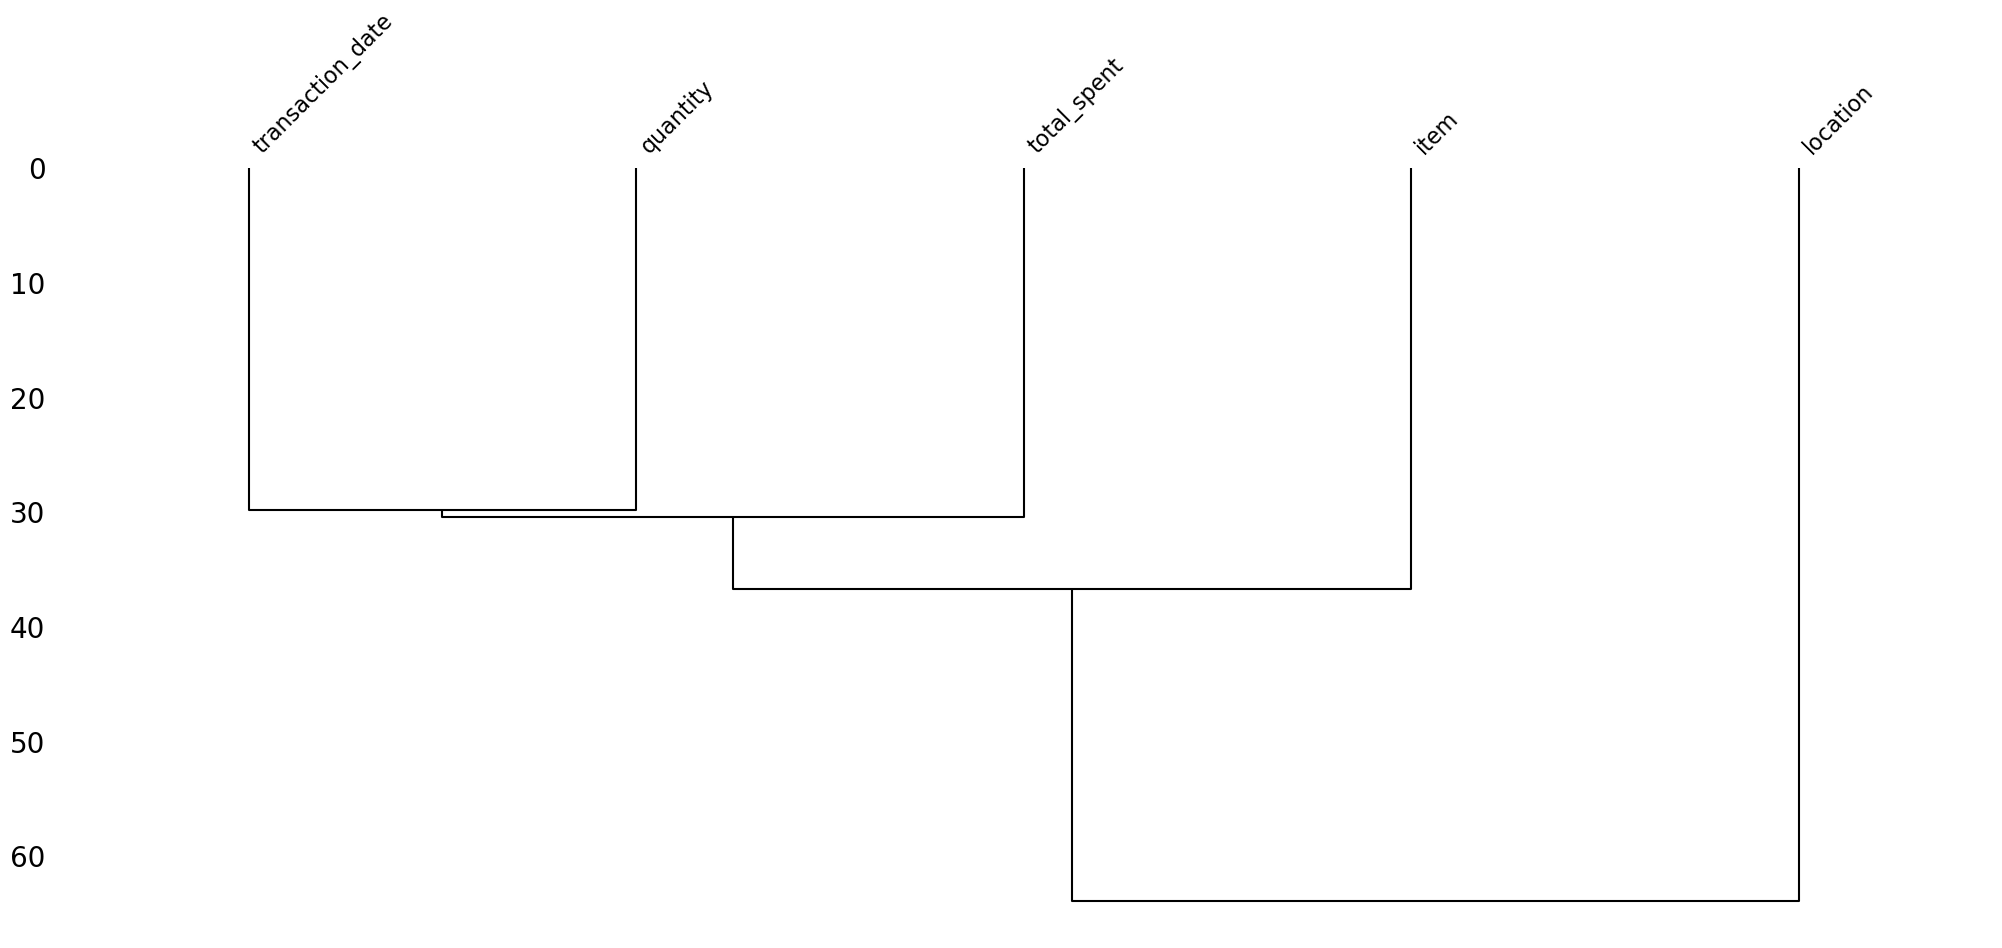

In [20]:
msno.dendrogram(df)

In [21]:
# drop missing rows for location, date, item
cols = ['location', 'transaction_date','item']
for col in cols:
    df=df[~df[col].isna()]

In [22]:
# replace missing quantity, total spent with mean values
df['quantity']=df['quantity'].fillna(df['quantity'].mean())
df['total_spent']=df['total_spent'].fillna(df['total_spent'].mean())

In [23]:
# verify results
df.head()

,item,quantity,total_spent,location,transaction_date
Transaction ID,,,,,
TXN_1961373,coffee,2.0,4.000000,takeaway,2023-09-08
TXN_4977031,cake,4.0,12.000000,instore,2023-05-16
TXN_4271903,cookie,4.0,8.934259,instore,2023-07-19
TXN_3160411,coffee,2.0,4.000000,instore,2023-06-11
TXN_2064365,sandwich,5.0,20.000000,instore,2023-12-31


# EDA 
This is a refined version of the original document, where I did do some agregations to explore any potential trends. I didn't include them in the final version because they weren`t the main focus of the project, and none of them were exciting. 

# Visualizations 
## Bar Chart
Here I wanted to visualize sales trends for each item by location, independent of date. 
I was hoping to uncover patterns in popularity of items in-store vs takeaway, and to uncover any insights related to quantity sold, and profit, which could lead to valuable buisness insights, however I found that the numbers were pretty evenly distributed.

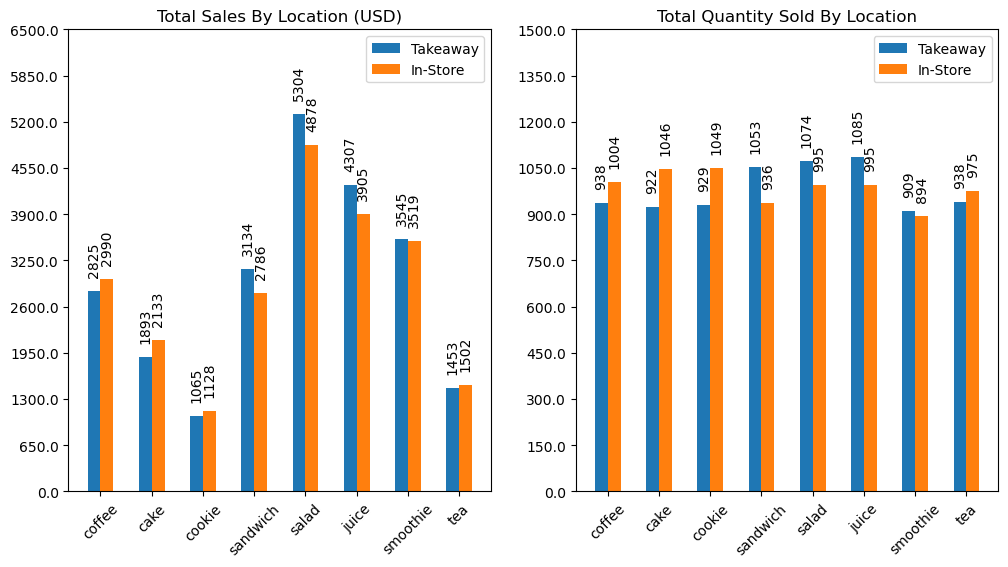

In [24]:
# retrieve data for bar chart

# subsetting data by time, location, total spent, quantity
# agregating data to get sums for each item by location for total spent, quantity 
location_sales= df.groupby(['location','item'])[['total_spent']].sum()
location_quantity = df.groupby(['location','item'])[['quantity']].sum()

# Get the item names
items = list(df['item'].unique())

# Subsetting the sales data for each bar in each chart, and converting them to list format:

# values chart 1
bar1_values = location_sales.loc['instore'].T.values.flatten().tolist()
bar2_values = location_sales.loc['takeaway'].T.values.flatten().tolist()

# values chart 2
bar3_values = location_quantity.loc['instore'].T.values.flatten().tolist()
bar4_values = location_quantity.loc['takeaway'].T.values.flatten().tolist()

# x and y ranges for both charts:

# number of bar categories
indx = np.arange(len(items))
# y index values for both charts
yrange1 = np.linspace(0,6500,10+1)
yrange2 = np.linspace(0,1500,10+1)

# category labels, bar width
xticklabels = items
bar_width = 0.25

# create figure
fig, ax = plt.subplots(1, 2, figsize = (12,6))

# create bars
takeway_sales = ax[0].bar(indx - bar_width/2, bar1_values, bar_width, linewidth=0, label = 'Takeaway')
instore_sales = ax[0].bar(indx + bar_width/2, bar2_values, bar_width, linewidth=0, label = 'In-Store')

takeaway_quantity = ax[1].bar(indx - bar_width/2, bar3_values, bar_width, label = 'Takeaway')
instore_quantity = ax[1].bar(indx + bar_width/2, bar4_values, bar_width, label = 'In-Store')

# set x and y ranges, labels for chart 1
ax[0].set_xticks(indx)
ax[0].set_xticklabels(items,rotation=45)

ax[0].set_yticks(yrange1)
ax[0].set_yticklabels(yrange1)

ax[0].set_title('Total Sales By Location (USD)')

ax[0].legend()

# set x and y labels for chart 2
ax[1].set_xticks(indx)
ax[1].set_xticklabels(items,rotation=45)

ax[1].set_yticks(yrange2)
ax[1].set_yticklabels(yrange2)

ax[1].set_title('Total Quantity Sold By Location')

ax[1].legend()

# create labeling function
def insert_data_labels(ax,bars):
    for bar in bars:
        bar_height = bar.get_height()
        ax.annotate('{0:.0f}'.format(bar.get_height()),   # look up {0: .0f}, label with sales values
                    xy = (bar.get_x() + bar.get_width() / 2, bar_height),
                    xytext = (0,10),                       # xytext forgot
                    textcoords = 'offset points',
                    ha = 'center',
                    va = 'bottom',
                    rotation=90
        )

# insert labels for both charts
insert_data_labels(ax[0],takeway_sales)
insert_data_labels(ax[0],instore_sales)

insert_data_labels(ax[1],takeaway_quantity)
insert_data_labels(ax[1],instore_quantity)
# show plot     
plt.show()     

# Time-Series Visualizations

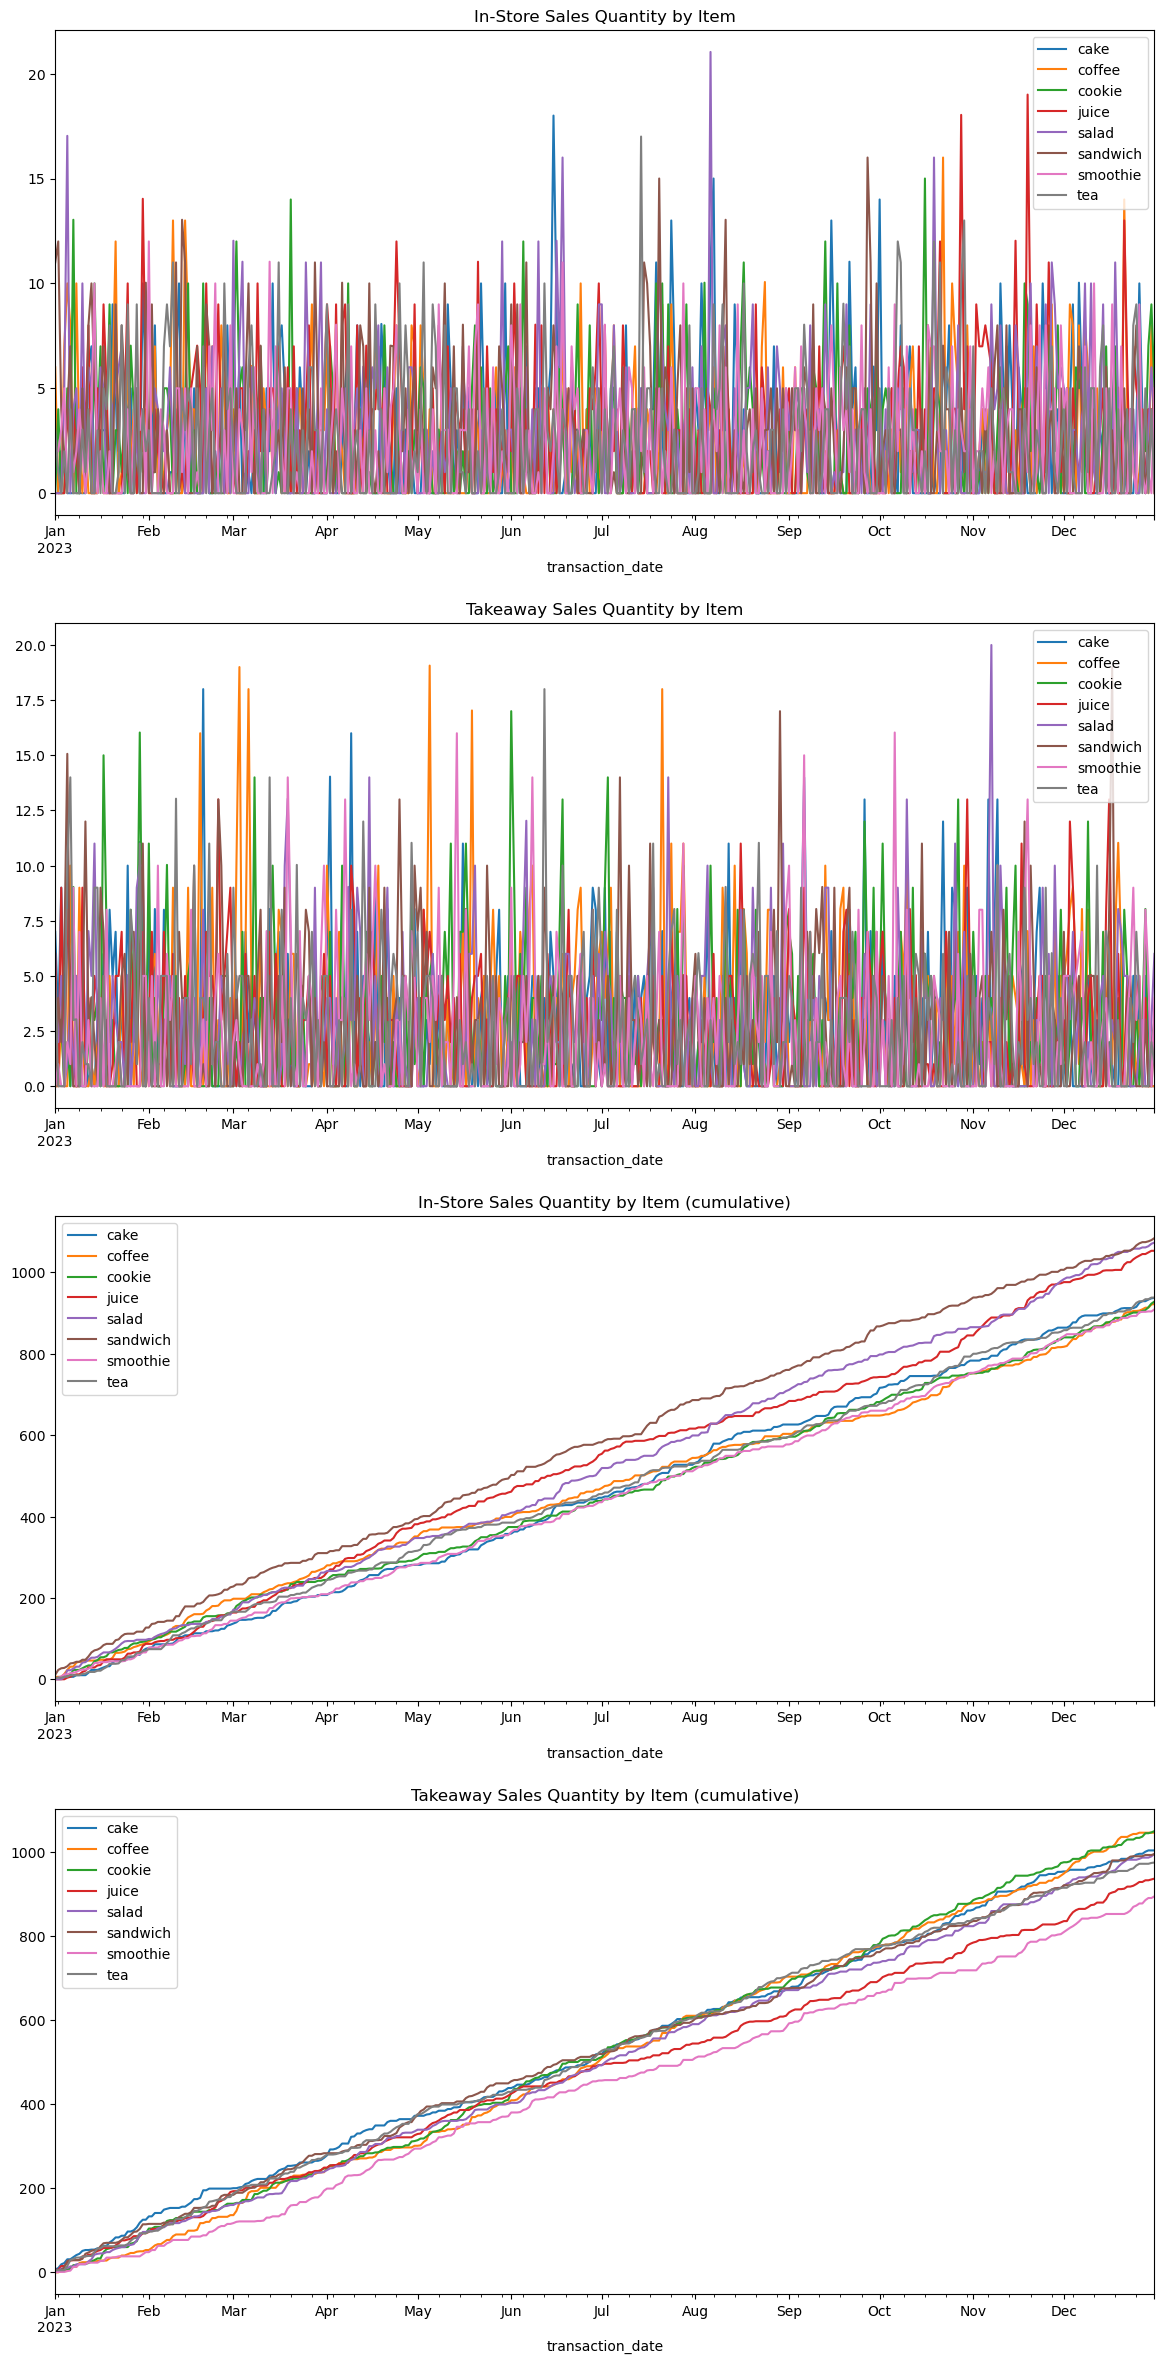

In [35]:
# better to split into locations first
instore_dataset = (df[df['location']=='instore'].reset_index()
           .groupby(['transaction_date', 'item'], as_index = False)[['quantity','total_spent']]
           .sum()
           .sort_values('transaction_date')
          )

takeaway_dataset = (df[df['location']=='takeaway'].reset_index()
                    .groupby(['transaction_date','item'], as_index = False)[['quantity','total_spent']]
                    .sum()
                    .sort_values('transaction_date')
                   )
instore_dataset['cumulative_quantity'] = instore_dataset.groupby('item')['quantity'].cumsum()
takeaway_dataset['cumulative_quantity']= takeaway_dataset.groupby('item')['quantity'].cumsum()

fig, ax = plt.subplots(4,1,figsize=(12,24))

for key, data in instore_dataset.groupby('item')[['transaction_date','quantity']]:
    data.plot('transaction_date','quantity',ax=ax[0],label=key)

for key, data in takeaway_dataset.groupby('item')[['transaction_date','quantity']]:
    data.plot('transaction_date', 'quantity',ax=ax[1], label=key)

for key, data in instore_dataset.groupby('item')[['transaction_date','cumulative_quantity']]:
    data.plot('transaction_date','cumulative_quantity',ax=ax[2],label=key)

for key, data in takeaway_dataset.groupby('item')[['transaction_date','cumulative_quantity']]:
    data.plot('transaction_date', 'cumulative_quantity',ax=ax[3], label=key)
    
ax[0].set_title('In-Store Sales Quantity by Item')
ax[1].set_title('Takeaway Sales Quantity by Item')
ax[2].set_title('In-Store Sales Quantity by Item (cumulative)')
ax[3].set_title('Takeaway Sales Quantity by Item (cumulative)')

fig.tight_layout(pad=2.)
plt.show()

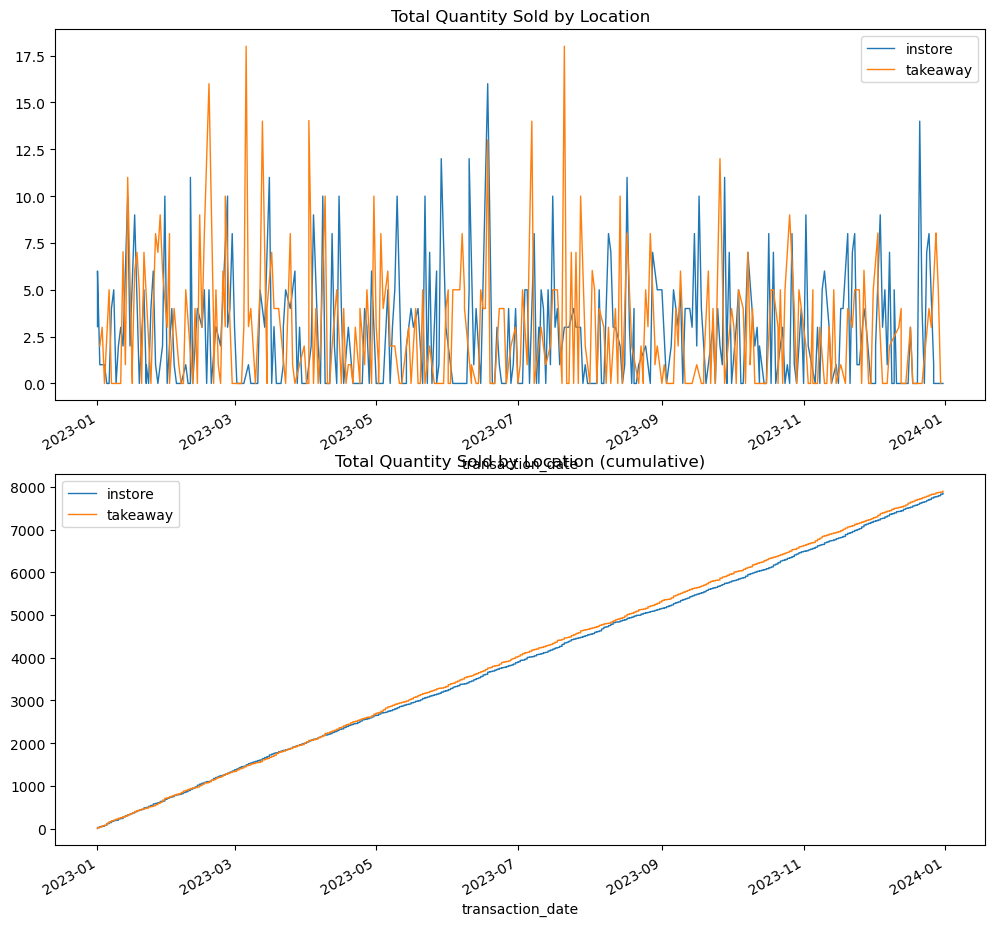

In [39]:
# Better way to do it. Group by independent variables, subset by dependent variables
# take every 10th index
dataset = (df.reset_index()
           .groupby(['location','transaction_date', 'item'], as_index = False)[['quantity','total_spent']]
           .sum()
           .sort_values(by='transaction_date')
          )
dataset['cumulative_quantity'] = dataset.groupby('location')['quantity'].cumsum()
sample = dataset.iloc[::10]

fig, ax = plt.subplots(2,1,figsize=(12,12))
for key, data in sample.groupby('location'):
    data.plot('transaction_date','quantity', ax=ax[0], linewidth=1, label=key)

for key, data in dataset.groupby('location'):
    data.plot('transaction_date','cumulative_quantity', ax=ax[1], linewidth=1, label=key)
    
ax[0].set_title('Total Quantity Sold by Location')
ax[1].set_title('Total Quantity Sold by Location (cumulative)')

plt.show()

Reducing the grainularity of the data increased readability for quantity vs location. Now I can see that there is clearly something happening for in-store sales around October of 2023. 
If this were data for a real business, I would need to investigate further by asking marketing about ad campaigns around that time frame, and I would do research into what was happening around that time period that could have lead to the increase in in-store sales, so that we could perhaps replicate that in the future. 

I did try this method of simplifying with sales by item, however it changed the shape of the graph. I am sure there are better methods out there that I haven`t yet discovered, but for now I will keep this idea in mind for simple time series visualizations. 